In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from pickletools import optimize
import tensorflow as tf 
import plotly.express as px

In [2]:
dfc=pd.read_csv("C:\\Users\\Mil\\Desktop\\Maestria MIL\\Aprendizaje\\Clase 3\\Proyecto Final\\Data\\wdbc.data",header=None)
headers = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se', 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
dfc.columns=headers
dfc

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [3]:
dfc.shape

(569, 32)

In [4]:
dfc.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
dfc=dfc.drop(["id"],axis=1)

In [6]:
dfc.shape

(569, 31)

In [7]:
dfc.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

Text(0.5, 1.0, 'Matriz de Correlación')

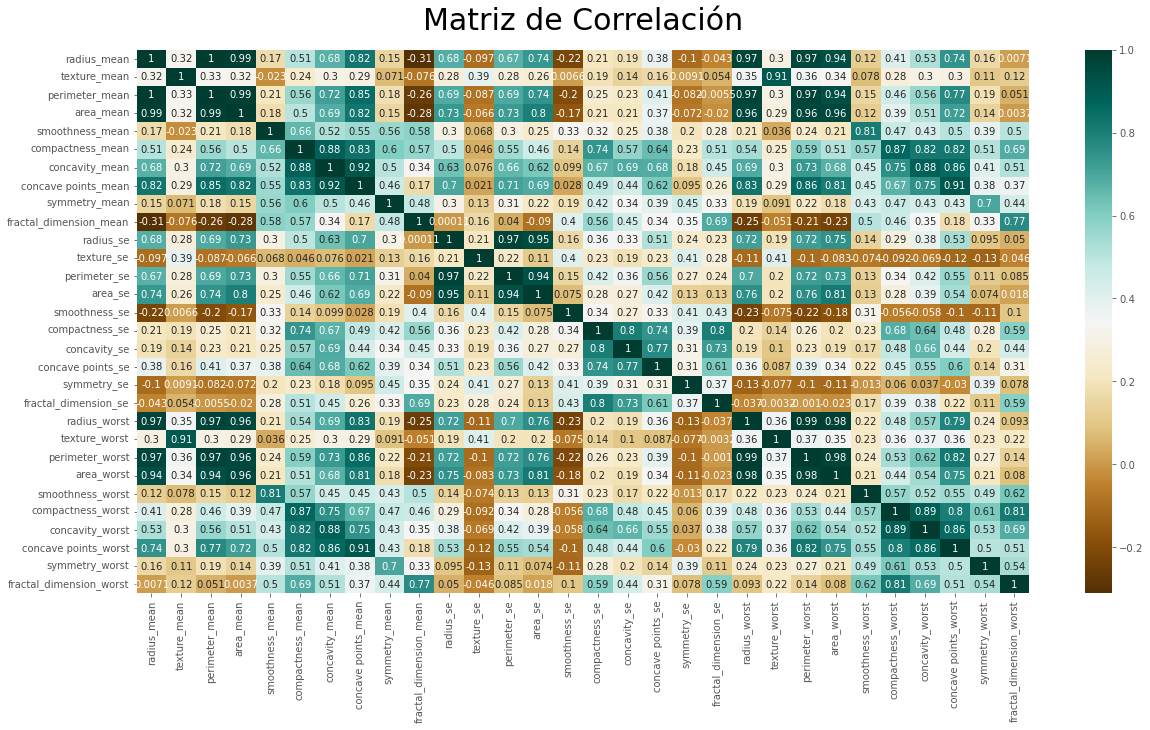

In [8]:
plt.figure(figsize=(20,10))
mapacalor = sns.heatmap(dfc.corr(),cmap='BrBG',annot=True)

mapacalor.set_title('Matriz de Correlación', fontdict={'fontsize':30}, pad=20)

In [9]:
dfc.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
print("Total Casos Diagnosticados:", str(dfc.shape[0]),"\n","Casos Benignos:", 
      dfc.diagnosis.value_counts()['B'],"\n","Casos Malignos",dfc.diagnosis.value_counts()['M'])

Total Casos Diagnosticados: 569 
 Casos Benignos: 357 
 Casos Malignos 212


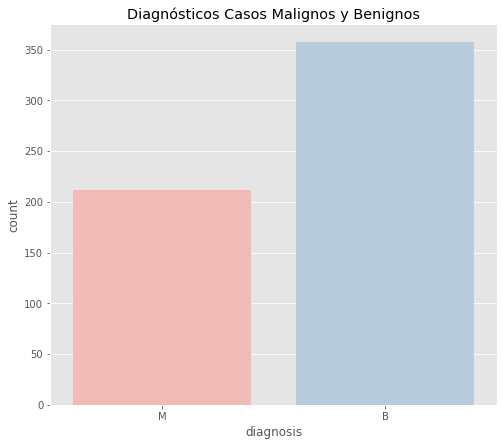

In [11]:
plt.figure(figsize=(8,7))
sns.countplot(x="diagnosis", data=dfc,palette='Pastel1')
plt.title("Diagnósticos Casos Malignos y Benignos")
plt.show()

In [12]:
lbe_dfc=LabelEncoder()
dfc['diagnosis'] = lbe_dfc.fit_transform(dfc['diagnosis'])

In [13]:
dfc

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [14]:
escalar=StandardScaler()
escalar.fit(dfc)
datos_escalados= escalar.transform(dfc)

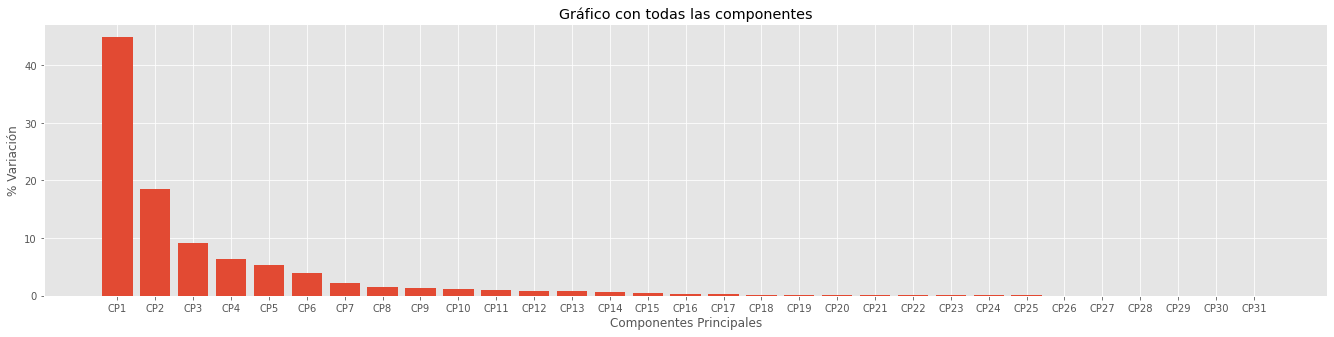

In [15]:
pca=PCA()
pca.fit(datos_escalados)

porvar = np.round(pca.explained_variance_ratio_*100, decimals=1)  
et = ['CP'+str(c) for c in range(1,len(porvar)+1)]

f, ax = plt.subplots(figsize=(23,5))
plt.bar(x=range(1,len(porvar)+1), height=porvar, tick_label=et)
plt.xlabel('Componentes Principales')
plt.ylabel('% Variación')
plt.title('Gráfico con todas las componentes')
plt.show()

In [16]:
comp=3
pca=PCA(n_components=comp)
pca.fit(datos_escalados)
x_dfc_pca=pca.transform(datos_escalados)

In [17]:
x_dfc_pca

array([[ 9.22577011,  2.11619563, -0.94810915],
       [ 2.6558016 , -3.78477586, -0.50282496],
       [ 5.89249212, -1.00557896, -0.48714898],
       ...,
       [ 1.53007727, -1.95887147,  0.46571815],
       [10.40500789,  1.84907792, -1.77932757],
       [-5.50486158, -0.76634841,  1.36862306]])

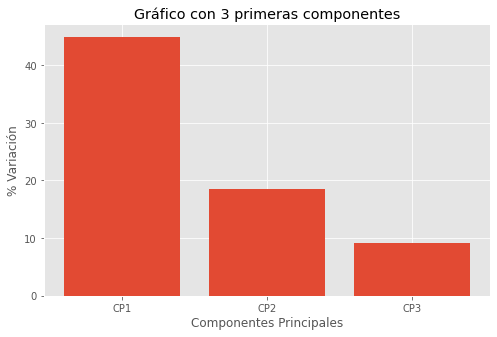

In [18]:
porvars = np.round(pca.explained_variance_ratio_*100, decimals=1)
ets = ['CP'+str(c) for c in range(1,len(porvars)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(8,5))
plt.bar(x=range(1,len(porvars)+1), height=porvars, tick_label=ets)
plt.xlabel('Componentes Principales')
plt.ylabel('% Variación')
plt.title('Gráfico con '+ str(comp) + ' primeras componentes')
plt.show()

In [19]:
datos_escalados.shape, x_dfc_pca.shape

((569, 31), (569, 3))

In [20]:
expvar = pca.explained_variance_ratio_
expvar


array([0.44896035, 0.18472104, 0.09183385])

In [21]:
porvar = (np.cumsum(np.round(expvar, decimals = 3)))*100
porvar

array([44.9, 63.4, 72.6])

In [22]:
dfc_pca = pd.DataFrame(data = x_dfc_pca, columns =['CP'+str(i) for i in range(1,comp+1)])
dfc_pca

CP1        CP2       CP3
0     9.225770   2.116196 -0.948109
1     2.655802  -3.784776 -0.502825
2     5.892492  -1.005579 -0.487149
3     7.135401  10.318716 -3.339501
4     4.129423  -1.905579  1.454000
..         ...        ...       ...
564   6.593983  -3.454947  2.570876
565   4.024833  -3.556006  2.047373
566   1.530077  -1.958871  0.465718
567  10.405008   1.849078 -1.779328
568  -5.504862  -0.766348  1.368623

[569 rows x 3 columns]

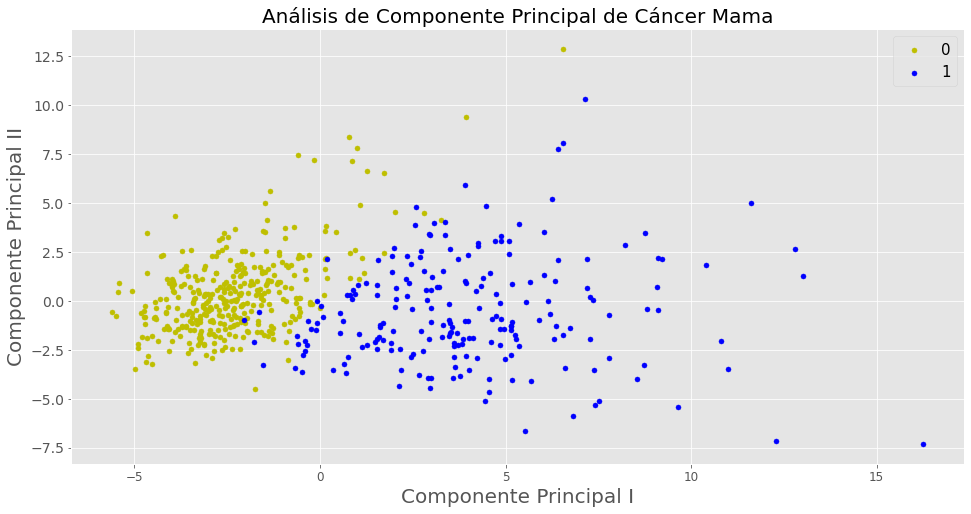

In [23]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente Principal I', fontsize=20)
plt.ylabel('Componente Principal II', fontsize=20)
plt.title("Análisis de Componente Principal de Cáncer Mama", fontsize=20)
objetivos = [0,1]
colores = ['y','b']
for objetivo, color in zip(objetivos, colores):
    indicespamantener = dfc['diagnosis'] == objetivo
    plt.scatter(dfc_pca.loc[indicespamantener,'CP1'],
                dfc_pca.loc[indicespamantener, 'CP2'], c = color, s = 25)

plt.legend(objetivos,prop={'size': 15})

In [24]:
X=dfc.drop('diagnosis',axis=1)
y=dfc['diagnosis']

In [25]:
len(X.columns)

30

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (426, 30)
Prueba: (143, 30)


In [27]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [28]:
X_test

array([[-0.47853809, -0.21371678, -0.45835473, ..., -0.27372978,
         0.07289581,  0.09152022],
       [ 1.37424404,  0.38950001,  1.29239853, ...,  0.84579664,
        -0.67110896, -1.02766663],
       [ 0.37769352, -0.01783827,  0.3904579 , ...,  0.44803208,
        -0.21152934, -0.28706636],
       ...,
       [-0.88804017, -0.60769971, -0.87720113, ..., -0.66701045,
         0.04718507, -0.35853687],
       [ 1.62338166,  0.57647495,  1.55597935, ...,  1.71220016,
        -0.32240694, -0.49629888],
       [-1.11140494, -1.63383602, -1.09012501, ..., -0.77332207,
        -0.05083716, -0.44088334]])

In [29]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int32

In [30]:
mode=pd.DataFrame()

In [31]:
def exemodel(X_train, y_train, X_test, y_test, clf):
    
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # Train confusion matrix
    y_pred = clf.predict(X_train)
    matcon = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    dispmatcon = ConfusionMatrixDisplay(confusion_matrix=matcon, display_labels=clf.classes_)
    tracc=accuracy_score(y_train, y_pred)
    dispmatcon.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # Test confusion matrix
    y_pred = clf.predict(X_test)
    matcon = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    dispmatcon = ConfusionMatrixDisplay(confusion_matrix=matcon, display_labels=clf.classes_)
    teacc=accuracy_score(y_test, y_pred)
    dispmatcon.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    mo={'Modelo':get_clf_name(clf),'Train':tracc*100,'Test':teacc*100}
    return mode.append(mo,ignore_index=True)


In [32]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

LogisticRegression
Accuracy Train:  0.9859154929577465
Accuracy Test:  0.986013986013986


Modelo      Train       Test
0  LogisticRegression  98.591549  98.601399

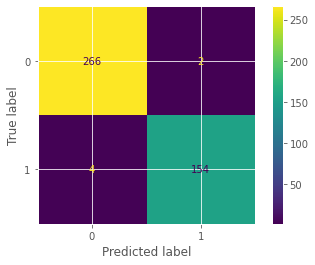

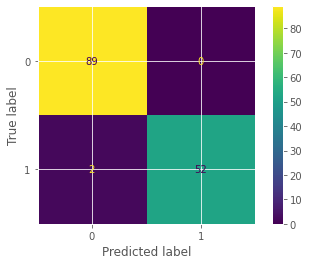

In [33]:
#Modelo 1
LR = LogisticRegression()
clf=LR
#exemodel(X_train, y_train, X_test, y_test, clf)
mod=pd.DataFrame()
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head()


SGDClassifier
Accuracy Train:  0.9882629107981221
Accuracy Test:  0.972027972027972


Modelo      Train       Test
0  LogisticRegression  98.591549  98.601399
1       SGDClassifier  98.826291  97.202797

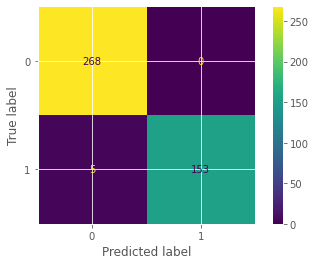

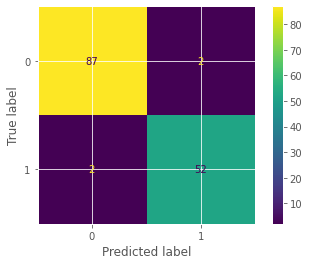

In [34]:
SGDC = SGDClassifier()
clf= SGDC
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(10)

DecisionTreeClassifier
Accuracy Train:  1.0
Accuracy Test:  0.9230769230769231


Modelo       Train       Test
0      LogisticRegression   98.591549  98.601399
1           SGDClassifier   98.826291  97.202797
2  DecisionTreeClassifier  100.000000  92.307692

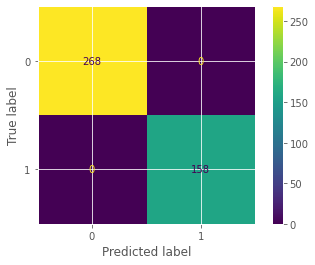

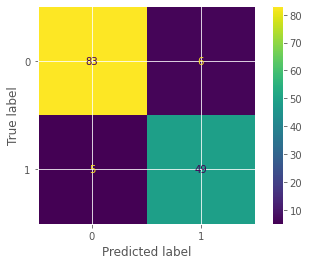

In [35]:
#Modelo 3
DTC = DecisionTreeClassifier()
clf=DTC
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head()

RandomForestClassifier
Accuracy Train:  0.9812206572769953
Accuracy Test:  0.965034965034965


Modelo       Train       Test
0      LogisticRegression   98.591549  98.601399
1           SGDClassifier   98.826291  97.202797
2  DecisionTreeClassifier  100.000000  92.307692
3  RandomForestClassifier   98.122066  96.503497

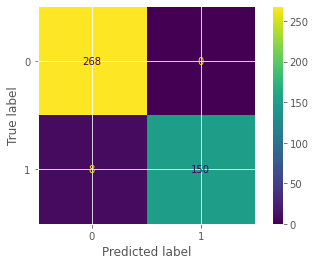

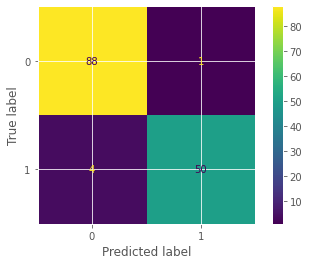

In [36]:
#Modelo 4
RFC = RandomForestClassifier(max_depth=3)
clf=RFC
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(25)

KNeighborsClassifier
Accuracy Train:  0.9694835680751174
Accuracy Test:  0.951048951048951


Modelo       Train       Test
0      LogisticRegression   98.591549  98.601399
1           SGDClassifier   98.826291  97.202797
2  DecisionTreeClassifier  100.000000  92.307692
3  RandomForestClassifier   98.122066  96.503497
4    KNeighborsClassifier   96.948357  95.104895

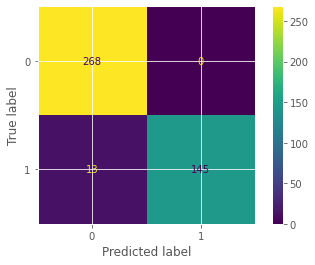

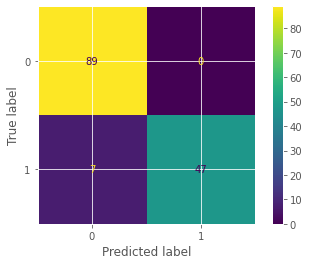

In [37]:
#Modelo 2
knn = KNeighborsClassifier (n_neighbors=2)
clf = knn
#exemodel(X_train, y_train, X_test, y_test, clf)
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head()

SVC
Accuracy Train:  0.9882629107981221
Accuracy Test:  0.972027972027972


Modelo       Train       Test
0      LogisticRegression   98.591549  98.601399
1           SGDClassifier   98.826291  97.202797
2  DecisionTreeClassifier  100.000000  92.307692
3  RandomForestClassifier   98.122066  96.503497
4    KNeighborsClassifier   96.948357  95.104895
5                     SVC   98.826291  97.202797

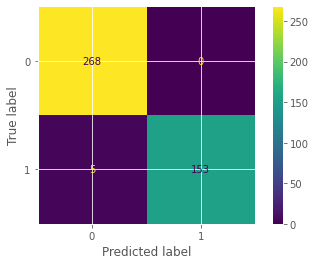

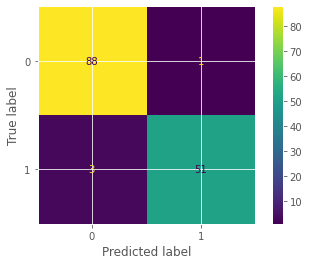

In [38]:
#Modelo 5
svc = SVC()
clf =svc
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(10)

GaussianNB
Accuracy Train:  0.9366197183098591
Accuracy Test:  0.951048951048951


Modelo       Train       Test
0      LogisticRegression   98.591549  98.601399
1           SGDClassifier   98.826291  97.202797
2  DecisionTreeClassifier  100.000000  92.307692
3  RandomForestClassifier   98.122066  96.503497
4    KNeighborsClassifier   96.948357  95.104895
5                     SVC   98.826291  97.202797
6              GaussianNB   93.661972  95.104895

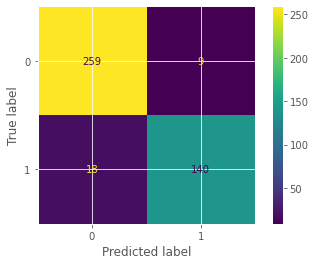

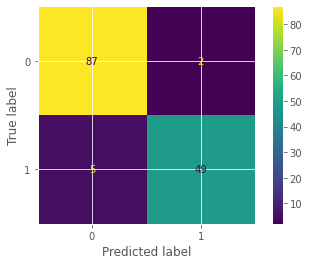

In [39]:
#Modelo 6
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
clf= GNB
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(10)

GradientBoostingClassifier
Accuracy Train:  1.0
Accuracy Test:  0.972027972027972


Modelo       Train       Test
0          LogisticRegression   98.591549  98.601399
1               SGDClassifier   98.826291  97.202797
2      DecisionTreeClassifier  100.000000  92.307692
3      RandomForestClassifier   98.122066  96.503497
4        KNeighborsClassifier   96.948357  95.104895
5                         SVC   98.826291  97.202797
6                  GaussianNB   93.661972  95.104895
7  GradientBoostingClassifier  100.000000  97.202797

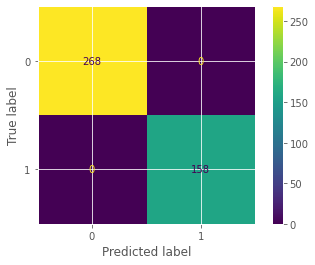

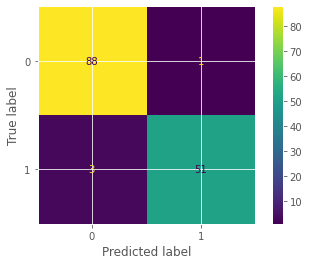

In [40]:
GBC = GradientBoostingClassifier()
clf = GBC
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(10)

XGBClassifier
Accuracy Train:  1.0
Accuracy Test:  0.972027972027972


Modelo       Train       Test
0          LogisticRegression   98.591549  98.601399
1               SGDClassifier   98.826291  97.202797
2      DecisionTreeClassifier  100.000000  92.307692
3      RandomForestClassifier   98.122066  96.503497
4        KNeighborsClassifier   96.948357  95.104895
5                         SVC   98.826291  97.202797
6                  GaussianNB   93.661972  95.104895
7  GradientBoostingClassifier  100.000000  97.202797
8               XGBClassifier  100.000000  97.202797

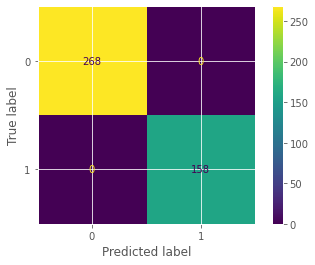

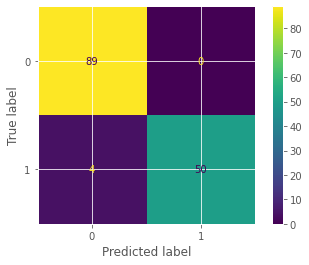

In [41]:
#Modelo XGBoost
from xgboost import XGBClassifier
XGB = XGBClassifier()
clf= XGB
mod=mod.append(exemodel(X_train, y_train, X_test, y_test, clf),ignore_index=True)
mod.head(20)

In [42]:
mod.sort_values(by="Test", ascending=False)

Modelo       Train       Test
0          LogisticRegression   98.591549  98.601399
1               SGDClassifier   98.826291  97.202797
5                         SVC   98.826291  97.202797
7  GradientBoostingClassifier  100.000000  97.202797
8               XGBClassifier  100.000000  97.202797
3      RandomForestClassifier   98.122066  96.503497
4        KNeighborsClassifier   96.948357  95.104895
6                  GaussianNB   93.661972  95.104895
2      DecisionTreeClassifier  100.000000  92.307692

In [43]:

figura=px.bar(mod.sort_values(by="Test",ascending=False),x="Modelo", y="Test",
             template="plotly_dark",title="Accuracy Modelos Test")
figura.update_layout(bargap=0.8)
figura.show()

In [45]:

figura=px.bar(mod.sort_values(by="Train",ascending=False),x="Modelo", y="Train",
             template="plotly_dark",title="Accuracy Modelos Train")
figura.update_layout(bargap=0.8)
figura.show()